In [1]:
# tests for points routines
%reset
%load_ext autoreload
%autoreload 2

from pySurf.points import *
import os
#from calibrate_align import *
from dataIO.fn_add_subfix import fn_add_subfix


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#avoid the annoying inline figures 
%matplotlib qt 
%qtconsole
from IPython.display import display

In [3]:
infolder=r'test\profilometer_scans\04_test_directions'
outfolder=r'test\profilometer_scans\04_test_directions_output'
testfiles=['05_xysurf_pp_Intensity.txt','06_xysurf_pm_Intensity.txt','07_xysurf_mp_Intensity.txt',
          '08_xysurf_mm_Intensity.txt','09_yxsurf_pp_Intensity.txt','10_yxsurf_pm_Intensity.txt',
          '11_yxsurf_mp_Intensity.txt','12_yxsurf_mm_Intensity.txt']
#definition for subplots
n=len(testfiles)
a = np.floor(n**0.5).astype(int) #nr of plots on horizontal
b = np.ceil(1.*n/a).astype(int) #nr of plots on vertical 

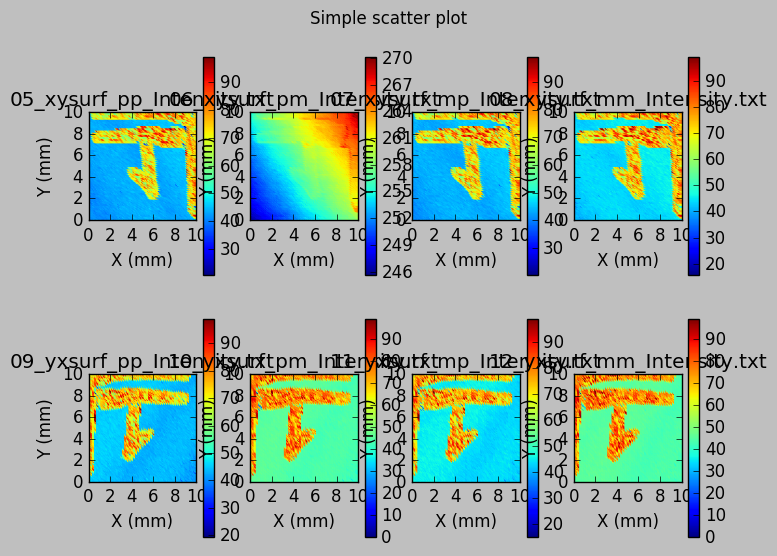

In [4]:
m_pts=[]
fig=plt.figure(1)
plt.clf()
plt.suptitle('Simple scatter plot')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.join(infolder,f),delimiter=',')
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,scatter=True,aspect='equal')
    plt.title(f)
    plt.show()
plt.savefig(os.path.join(outfolder,'01_scatterPlot.png'))
display(plt.gcf())

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


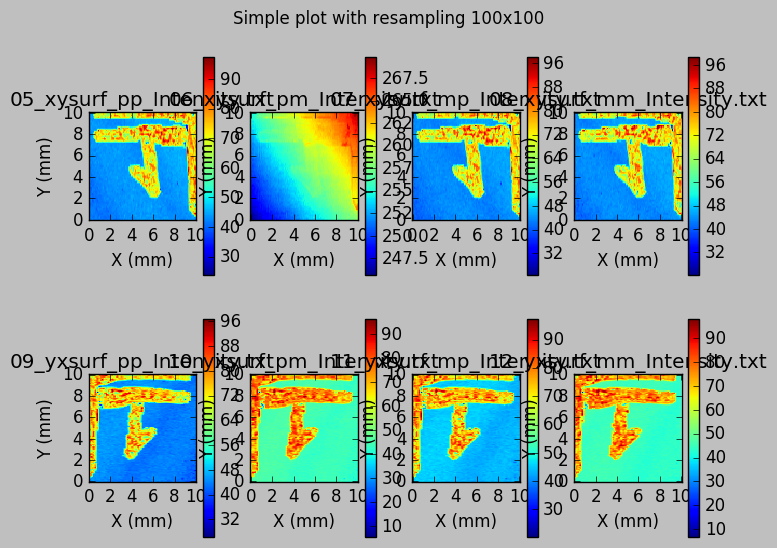

In [5]:
m_pts=[]
fig=plt.figure(2)
plt.clf()
plt.suptitle('Simple plot with resampling 100x100')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.join(infolder,f),delimiter=',')
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
    plt.show()
plt.savefig(os.path.join(outfolder,'02_simplePlot.png'))
display(plt.gcf())

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


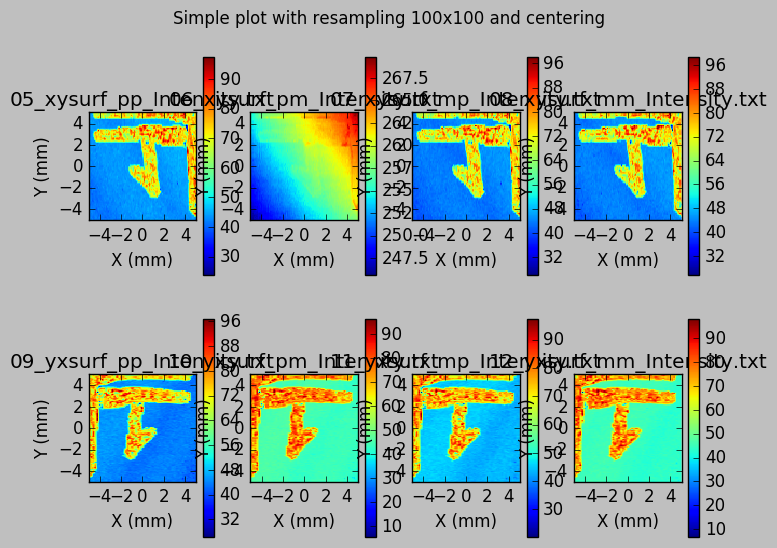

In [6]:
m_pts=[]
fig=plt.figure(3)
plt.clf()
plt.suptitle('Simple plot with resampling 100x100 and centering')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.join(infolder,f),delimiter=',',center=(0,0))
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
    plt.show()
plt.savefig(os.path.join(outfolder,'03_simplePlotCenter.png'))
display(plt.gcf())

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


C:\Users\Vincenzo\Google Drive\libraries\python\userKov\pySurf\points.py:180: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  assert xgrid!=None
C:\Users\Vincenzo\Google Drive\libraries\python\userKov\pySurf\points.py:181: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  assert ygrid!=None


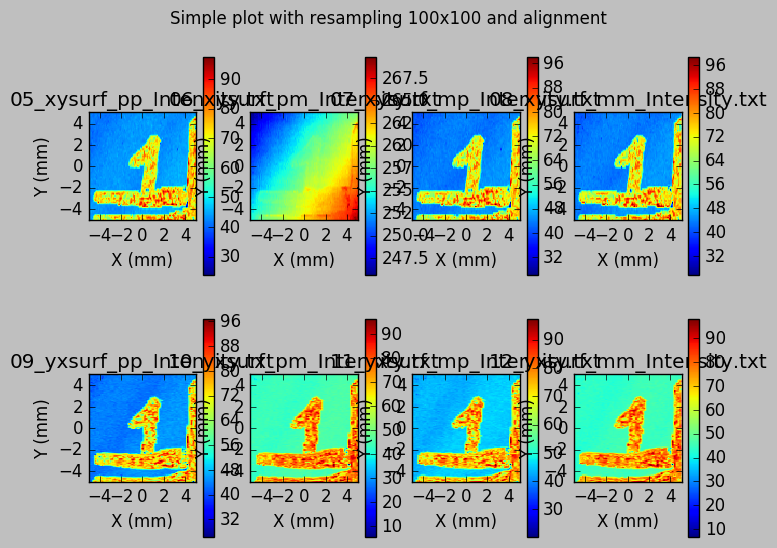

In [7]:
#test alignment and writing matrix

m_pts=[]
fig=plt.figure(3)
plt.clf()
plt.suptitle('Simple plot with resampling 100x100 and alignment')

for i,f in enumerate(testfiles):
    if i<=3:
        s=(1.,-1,1.) #x fast scanning
    else:
        s=(-1.,-1,1.) #y fast scanning
    pts=get_points(os.path.join(infolder,f),delimiter=',',center=(0,0),scale=s)
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
    plt.show()
    save_points(pts,os.path.join(outfolder,fn_add_subfix(f,'_matrix')),matrix=True,shape=(100,100))
plt.savefig(os.path.join(outfolder,'03_simplePlotCenter.png'))
display(plt.gcf())

In [8]:
xr,yr=span(pts[:,0]),span(pts[:,1])

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


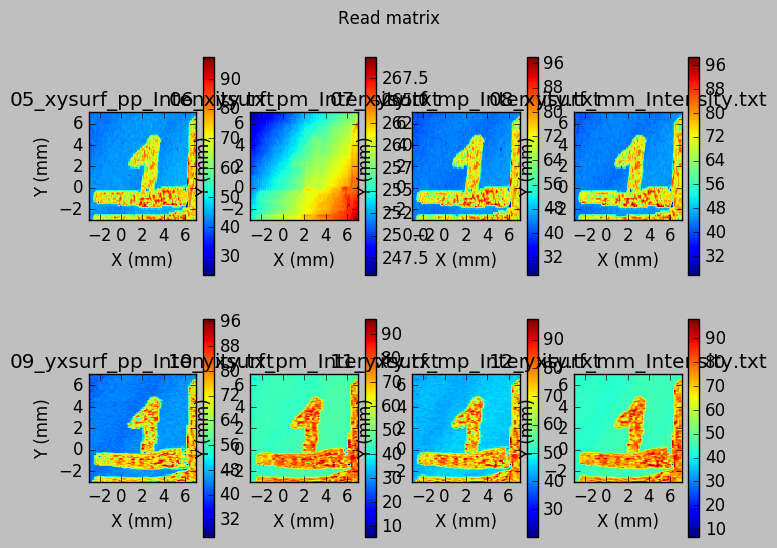

In [9]:
#test reading matrix and alignment. If range is not provided matrix index is
#  used, otherwise range is used and translated so that center of image has coordinates center. 

m_pts=[]
fig=plt.figure(4)
plt.clf()
plt.suptitle('Read matrix - center = (2,2)')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.join(outfolder,fn_add_subfix(f,'_matrix')),center=(2,2),matrix=1,
                  addaxis=True,xrange=xr,yrange=yr)
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
    plt.show()
plt.savefig(os.path.join(outfolder,'04_simplePlotCenter.png'))
display(plt.gcf())

In [10]:
#test on a single set of points. Points are put in random order and 
# data are plotted

s=(1.,-1,1.) #x fast scanning
pts=get_points(os.path.join(infolder,testfiles[2]),delimiter=',',center=(0,0),scale=s)

In [11]:
fax,shape=points_find_grid(pts)
print fax
print shape
xr,yr=span(pts[:,0]),span(pts[:,1])
xg=np.linspace(xr[0],xr[1],shape[0])
yg=np.linspace(yr[0],yr[1],shape[1])

0
[112, 51]


resampling...


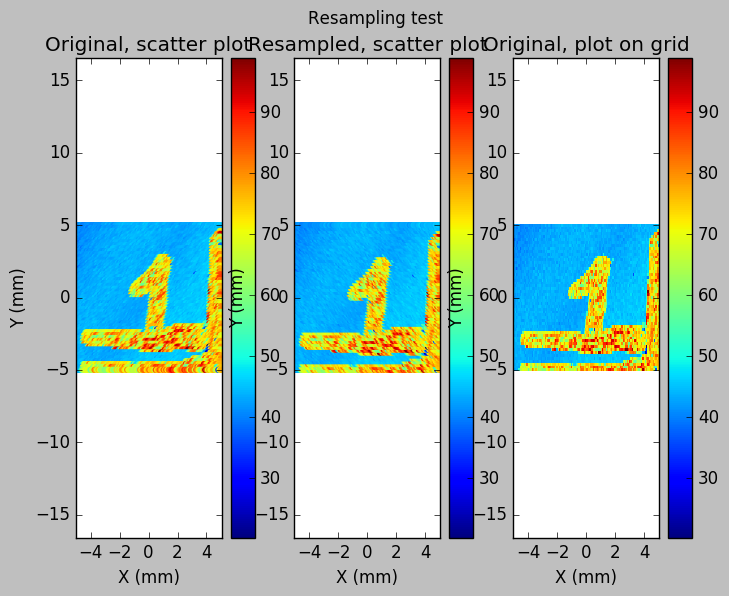

In [12]:
fig=plt.figure(5)
plt.clf()
plt.suptitle('Resampling test')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Resampled, scatter plot')
pp=resample_grid(pts,xg,yg)
plot_points(pp,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Original, plot on grid')
plot_points(pp,shape=shape,aspect='equal')
plt.savefig(os.path.join(outfolder,'05_resampling.png'))
display(plt.gcf())

resampling...


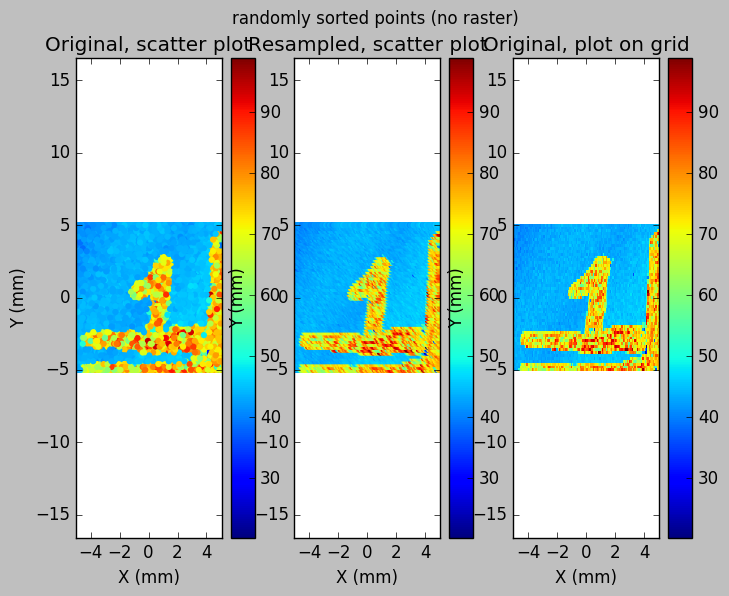

In [13]:
i=np.random.permutation(pts.shape[0])
pts=pts[i,:]

fig=plt.figure(6)
plt.clf()
plt.suptitle('randomly sorted points (no raster)')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Resampled, scatter plot')
pp=resample_grid(pts,xg,yg)
plot_points(pp,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Original, plot on grid')
plot_points(pp,shape=shape,aspect='equal')
plt.savefig(os.path.join(outfolder,'06_unsorted_points.png'))
display(plt.gcf())

In [14]:
# rebin points

s=(1.,-1,1.) #x fast scanning
pts=get_points(os.path.join(infolder,testfiles[2]),delimiter=',',center=(0,0),scale=s)

fax,shape=points_find_grid(pts)
print fax
print shape
xr,yr=span(pts[:,0]),span(pts[:,1])
xg=np.linspace(xr[0],xr[1],shape[0])
yg=np.linspace(yr[0],yr[1],shape[1])

0
[112, 51]


resampling...


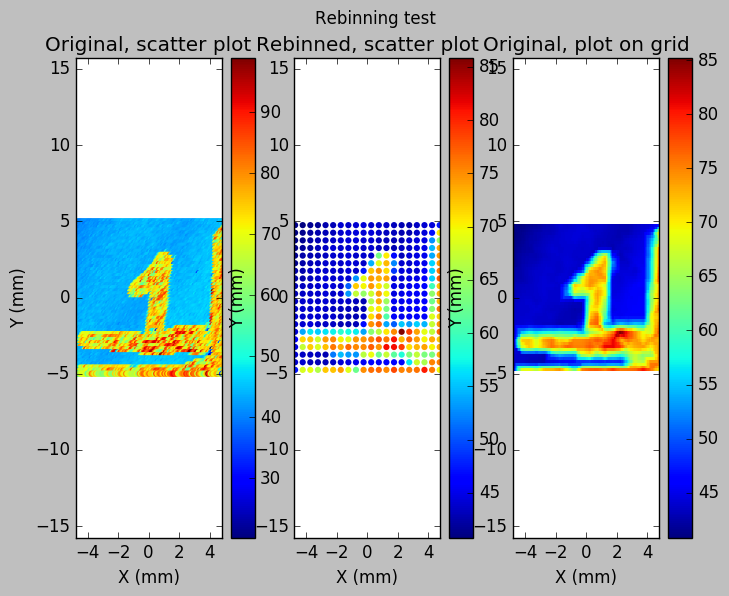

In [15]:
nbins=20

fig=plt.figure(7)
plt.clf()
plt.suptitle('Rebinning test')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Rebinned, scatter plot')
pp=rebin_points(pts,bins=nbins)
plot_points(pp,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Original, plot on grid')
plot_points(pp,shape=shape,aspect='equal')
plt.savefig(os.path.join(outfolder,'07_rebinning.png'))
display(plt.gcf())

## rotate and rebin

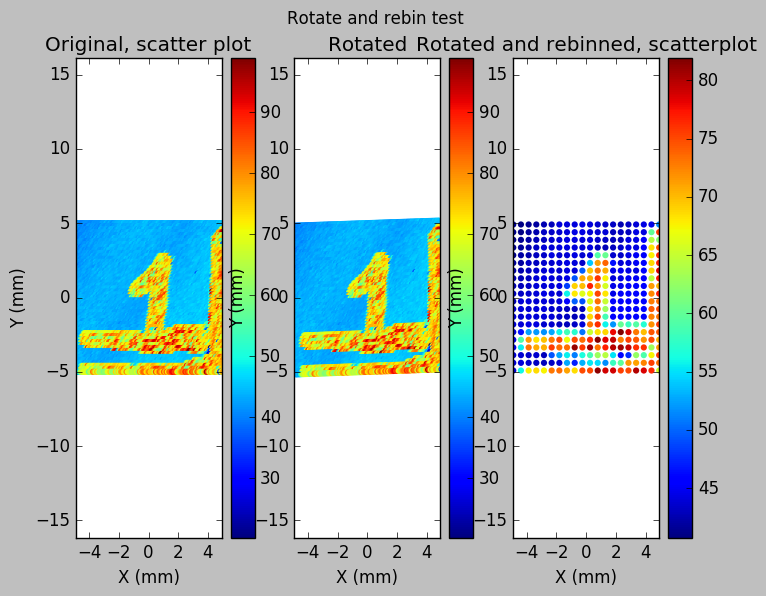

In [16]:
pts2=rotate_points(pts,2*np.pi/180)
pts3=rebin_points(pts2,bins=nbins)

fig=plt.figure(8)
plt.clf()
plt.suptitle('Rotate and rebin test')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Rotated')
plot_points(pts2,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Rotated and rebinned, scatterplot')
plot_points(pts3,scatter=1,aspect='equal')
plt.savefig(os.path.join(outfolder,'08_rotateandrebin.png'))
display(plt.gcf())